# Advanced Algorithms

## Greedy Algorithms

### Introduction

### Min Platforms

### Min Operations

## Graph Algorithms

### Graphs
* Has Nodes & Edges
* Tree is a type of a graph
  * A binary tree is a type of tree
  * A BST is a type of binary tree
  
### Directions & Cycles
* Undirected vs. Directed Graph
* Cycles can lead to infinite loops
  * Acyclic: graph that has no loops
* Frequently encountered graph: Directed Acyclic Graph (DAG)

### Connectivity
* A disconnected graph has some vertex that can't be reached by the other vertices
* Connected components: Connected graphs themselves that have no connection between them

Connectivity
* Measures the minimum number of elements that need to be removed for a graph to become disconnected
* Depending on the context of the graph, one can sometimes use connectivity to measure which graph is stronger

### Graph Representation

#### Edge List
```python
[[0, 1], [1, 2], [1, 3], [2, 3]]
```

#### Adjacency List
Vertices have an ID number that corresponds to the index in the array. There is a list of nodes that the given node is connected to.
```python
[[1], [0, 2, 3], [1, 3], [1, 2]]
```

#### Adjacency Matrices
```python
[[0, 1, 0, 0],
 [1, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0]]
```

## Graph Traversal

### DFS
* Can be implemented using a stack or recursion.
* $O(|E| + |V|)$

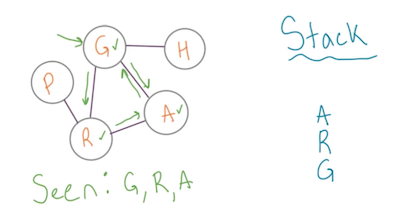

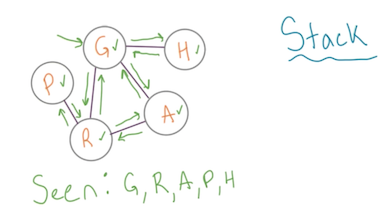

### DFS - Iterative Solution

### DFS - Recursive Solution

### BFS
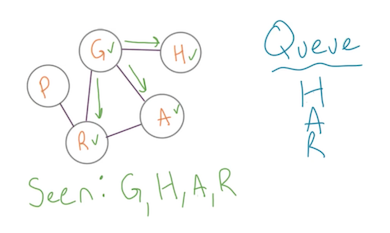
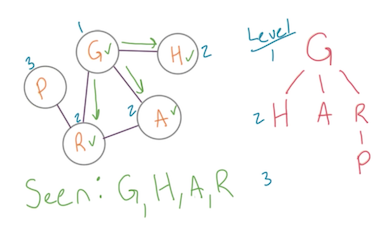
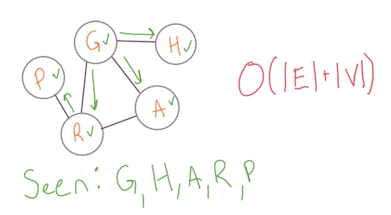


### Implement BFS

### Shortest Path & Dijkstra's Algorithm
Given a graph with weighted edges, find the shortest path where the sum of the edges is as small as possible. 

In an unweighted graph, the shortest path is the one with the fewest number of edges. 

Solution to the shortest path problem for an unweighted graph: BFS. 

#### Dijkstra's Algorithm
Solution to the shortest path problem for weighted undirected graphs: Dijkstra's Algorithm

* Give all vertices a distance value
  * Distance: sum of edge weights on a path between our starting point and the vertex we're on. 
  * At the end of the algorith, the distance will be the distance of the shortest path. 
  * The distance value we start with is infinity. It's a placeholder value that will update whenever we discover a node and have an actual distance to store. The node we're starting with has a distance of zero. 

A common implementation of Dijkstra's uses a min priority queue, where the element with a minimum priority, or minimum distance in our case, can be removed efficiently. 

We store all our nodes in the priority queue and use extract min to take out the minimum element (at first the only one with a distance of zero). 

From our starting node we have several options. Follow each edge and update the node on the other side with a distance value, which is just the weight of the edge. 

Next, pick the node with the smallest distance value. Because we always pick the node with the lowest distance, Dijkstra's is often called a greedy algorithm. 

Repeat the process visiting all adjacent nodes that are still in the queue and updating their distance values if we can decrease it at all. 

The basic runtime of Dijkstra's is the number of vertices squared: $O(|V|^2)$. Since in the worst case, we visit every node in the graph once or twice and every time we visit we need to search through the queue to find the minimum element. 

There are a lot of optimizations for Dijkstra's. If the priority queue is implemented really efficiently, the runtime looks more like this: $O(|E| + |V|*log(|V|))$.

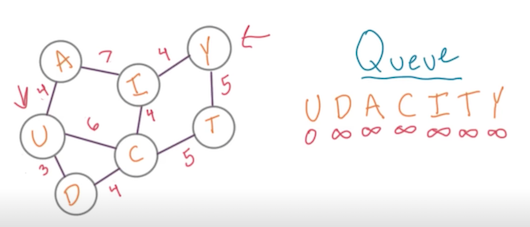
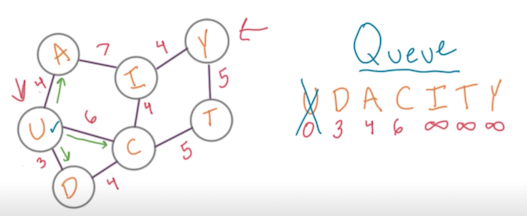
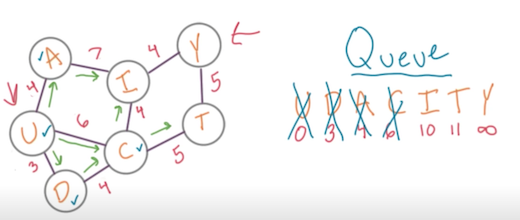

### Connecting Islands

## Dynamic Programming

### Knapsack Problem

### Smarter Approach

### Dynamic Programming

### Knapsack Exercise

### Longest Common Subsequence 

### Longest Palindromic Subsequence

### The Coin Change Problem

### Stock Prices

## A*

### Route Finding

### Uniform Cost Search

### On Uniform Cost

### A* Search

## Route Planner